# NGC 309: Get maps of properties from the collection of fitting results of all spatial bins

In [18]:
import numpy as np
import math
import sys, os
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.colors import LinearSegmentedColormap

global PIXEDFIT_HOME
PIXEDFIT_HOME = os.environ['PIXEDFIT_HOME']
sys.path.insert(0, PIXEDFIT_HOME+'/src')

%matplotlib inline

### Call function retrieve_fitresult_specphotosedfit to get maps of properties from the collection of fitting results of all spatial bins

In [ ]:
specphoto_pixbin = "pixbin_match_specphoto_crop_fluxmap_califa_NGC309.fits.gz"
specphoto_fluxmap = "match_specphoto_crop_fluxmap_califa_NGC309.fits.gz"

## get number of bins and filters set:
cube = fits.open(specphoto_pixbin)
photo_bin_flag = cube['photo_bin_flag'].data
nbins = int(cube[0].header['nbins_photo'])
cube.close()

## collect sampler fits names:
name_chains_fits = []
for ii in range(0,nbins):
    name = "chains_califa_NGC309_bin_%d.fits" % (ii+1)
    name_chains_fits.append(name)

from piXedfit_fitting import retrieve_fitresult_specphotosedfit

name_out_fits = "fitresults_califa_NGC309.fits"
retrieve_fitresult_specphotosedfit(specphoto_fits_binmap=specphoto_pixbin,
                                   name_chains_fits=name_chains_fits,
                                   specphoto_fits_fluxmap=specphoto_fluxmap,
                                   refband_SFR=0, refband_SM=11, name_out_fits=name_out_fits)

### Check the FITS file containing maps of properties

In [7]:
fitresult = fits.open("fitresults_califa_NGC309.fits")
print (fitresult[0].header)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                    8 / array data type                                NAXIS   =                    0 / number of array dimensions                     EXTEND  =                    T                                                  GAL_Z   =             0.018898                                                  NBINS   =                  212                                                  NFILTERS=                   12                                                  FIL0    = 'galex_fuv'                                                           FIL1    = 'galex_nuv'                                                           FIL2    = 'sdss_u  '                                                            FIL3    = 'sdss_g  '                                                            FIL4    = 'sdss_r  '                                                            FIL5    = 'sdss_i  '                    

### Get kpc per pixel using function kpc_per_pixel from piXedfit_images module

In [8]:
from piXedfit_images import kpc_per_pixel

z = float(fitresult[0].header['gal_z'])
arcsec_per_pixel = 1.5
kpc_per_pix = kpc_per_pixel(z,arcsec_per_pixel)
print ("kpc/pixel = %lf" % kpc_per_pix)

kpc/pixel = 0.575196


### Plot maps of properties

In [10]:
dim_y = fitresult['bin-logzsol-p50'].data.shape[0]
dim_x = fitresult['bin-logzsol-p50'].data.shape[1]

### SM:
param_str = 'log_mass'
map_prop_SM = np.zeros((dim_y,dim_x))
for yy in range(0,dim_y):
    for xx in range(0,dim_x):
        if photo_bin_flag[int(yy)][int(xx)] == 0:
            map_prop_SM[int(yy)][int(xx)] = -99.0
        elif photo_bin_flag[int(yy)][int(xx)] > 0:
            str_temp = 'pix-%s-p50' % param_str
            if math.pow(10.0,fitresult[str_temp].data[int(yy)][int(xx)]) > 0:
                map_prop_SM[int(yy)][int(xx)] = np.log10(math.pow(10.0,fitresult[str_temp].data[int(yy)][int(xx)])/kpc_per_pix/kpc_per_pix)
            else:
                map_prop_SM[int(yy)][int(xx)] = -99.0
                
### SFR:
param_str = 'log_sfr'
map_SFR = np.zeros((dim_y,dim_x))
for yy in range(0,dim_y):
    for xx in range(0,dim_x):
        if photo_bin_flag[int(yy)][int(xx)] == 0:
            map_SFR[int(yy)][int(xx)] = -99.0
        elif photo_bin_flag[int(yy)][int(xx)] > 0:
            str_temp = 'pix-%s-p50' % param_str
            if math.pow(10.0,fitresult[str_temp].data[int(yy)][int(xx)]) > 0:
                map_SFR[int(yy)][int(xx)] = np.log10(math.pow(10.0,fitresult[str_temp].data[int(yy)][int(xx)])/kpc_per_pix/kpc_per_pix)
            else:
                map_SFR[int(yy)][int(xx)] = -99.0
            
### Av:
#Rv = 4.05
param_str = 'dust2'
str_temp = 'bin-%s-p50' % param_str
map_Av = 1.086*fitresult[str_temp].data


## Z:
param_str = 'logzsol'
map_logzsol = np.zeros((dim_y,dim_x))
for yy in range(0,dim_y):
    for xx in range(0,dim_x):
        if photo_bin_flag[int(yy)][int(xx)] == 0:
            map_logzsol[int(yy)][int(xx)] = -99.0
        elif photo_bin_flag[int(yy)][int(xx)] > 0:
            str_temp = 'bin-%s-p50' % param_str
            map_logzsol[int(yy)][int(xx)] = fitresult[str_temp].data[int(yy)][int(xx)]
            
### Age_sys:
param_str = 'log_age'
map_age = np.zeros((dim_y,dim_x))
for yy in range(0,dim_y):
    for xx in range(0,dim_x):
        if photo_bin_flag[int(yy)][int(xx)] == 0:
            map_age[int(yy)][int(xx)] = -99.0
        elif photo_bin_flag[int(yy)][int(xx)] > 0:
            str_temp = 'bin-%s-p50' % param_str
            map_age[int(yy)][int(xx)] = fitresult[str_temp].data[int(yy)][int(xx)]

            
### MW-age:
param_str = 'log_mw_age'
map_mw_age = np.zeros((dim_y,dim_x))
for yy in range(0,dim_y):
    for xx in range(0,dim_x):
        if photo_bin_flag[int(yy)][int(xx)] == 0:
            map_mw_age[int(yy)][int(xx)] = -99.0
        elif photo_bin_flag[int(yy)][int(xx)] > 0:
            str_temp = 'bin-%s-p50' % param_str
            map_mw_age[int(yy)][int(xx)] = fitresult[str_temp].data[int(yy)][int(xx)]

### tau of SFH:
param_str = 'log_tau'
map_log_tau = np.zeros((dim_y,dim_x))
for yy in range(0,dim_y):
    for xx in range(0,dim_x):
        if photo_bin_flag[int(yy)][int(xx)] == 0:
            map_log_tau[int(yy)][int(xx)] = -99.0
        elif photo_bin_flag[int(yy)][int(xx)] > 0:
            str_temp = 'bin-%s-p50' % param_str
            map_log_tau[int(yy)][int(xx)] = fitresult[str_temp].data[int(yy)][int(xx)]
            
### alpha of SFH:
param_str = 'log_alpha'
map_log_alpha = np.zeros((dim_y,dim_x))
for yy in range(0,dim_y):
    for xx in range(0,dim_x):
        if photo_bin_flag[int(yy)][int(xx)] == 0:
            map_log_alpha[int(yy)][int(xx)] = -99.0
        elif photo_bin_flag[int(yy)][int(xx)] > 0:
            str_temp = 'bin-%s-p50' % param_str
            map_log_alpha[int(yy)][int(xx)] = fitresult[str_temp].data[int(yy)][int(xx)]

### beta of SFH:
param_str = 'log_beta'
map_log_beta = np.zeros((dim_y,dim_x))
for yy in range(0,dim_y):
    for xx in range(0,dim_x):
        if photo_bin_flag[int(yy)][int(xx)] == 0:
            map_log_beta[int(yy)][int(xx)] = -99.0
        elif photo_bin_flag[int(yy)][int(xx)] > 0:
            str_temp = 'bin-%s-p50' % param_str
            map_log_beta[int(yy)][int(xx)] = fitresult[str_temp].data[int(yy)][int(xx)]
         

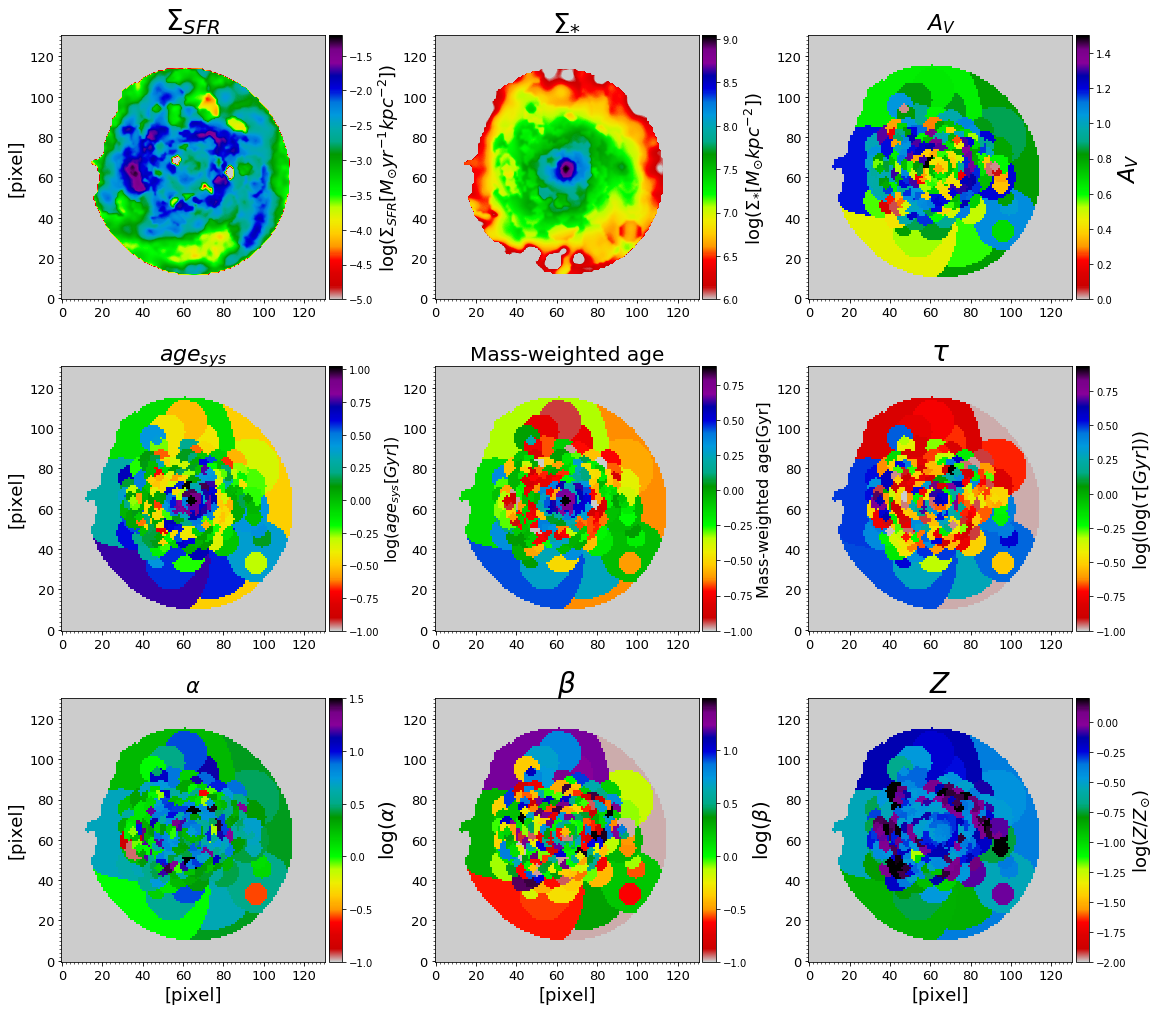

In [21]:
%matplotlib inline

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig1 = plt.figure(figsize=(17,15))

###=> SFR:
f1 = fig1.add_subplot(3, 3, 1)
plt.title(r"$\Sigma_{SFR}$", fontsize=28)
#plt.xlabel('[pixel]', fontsize=14)
plt.ylabel('[pixel]', fontsize=18)
plt.setp(f1.get_xticklabels(), fontsize=13)
plt.setp(f1.get_yticklabels(), fontsize=13)
minorLocator = MultipleLocator(2)
f1.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(2)
f1.yaxis.set_minor_locator(minorLocator)

plt.imshow(map_SFR, origin='lower', interpolation='bicubic', cmap='nipy_spectral_r', vmin=-5.0)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'log($\Sigma_{SFR}[M_{\odot}yr^{-1}kpc^{-2}]$)', fontsize=18)


###=> SM:
f1 = fig1.add_subplot(3, 3, 2)
plt.title(r"$\Sigma_{*}$", fontsize=28)
#plt.xlabel('[pixel]', fontsize=14)
#plt.ylabel('[pixel]', fontsize=14)
plt.setp(f1.get_xticklabels(), fontsize=13)
plt.setp(f1.get_yticklabels(), fontsize=13)
minorLocator = MultipleLocator(2)
f1.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(2)
f1.yaxis.set_minor_locator(minorLocator)

plt.imshow(map_prop_SM, origin='lower', interpolation='bicubic', cmap='nipy_spectral_r', vmin=6.0)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'log($\Sigma_{*}[M_{\odot}kpc^{-2}]$)', fontsize=18)

###=> AV
f1 = fig1.add_subplot(3, 3, 3)
plt.title(r"$A_{V}$", fontsize=22)
#plt.xlabel('[pixel]', fontsize=18)
#plt.ylabel('[pixel]', fontsize=18)
plt.setp(f1.get_xticklabels(), fontsize=13)
plt.setp(f1.get_yticklabels(), fontsize=13)
minorLocator = MultipleLocator(2)
f1.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(2)
f1.yaxis.set_minor_locator(minorLocator)

plt.imshow(map_Av, origin='lower', cmap='nipy_spectral_r')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'$A_{V}$', fontsize=23)

###=> age
f1 = fig1.add_subplot(3, 3, 4)
plt.title(r"$age_{sys}$", fontsize=22)
#plt.xlabel('[pixel]', fontsize=18)
plt.ylabel('[pixel]', fontsize=18)
plt.setp(f1.get_xticklabels(), fontsize=13)
plt.setp(f1.get_yticklabels(), fontsize=13)
minorLocator = MultipleLocator(2)
f1.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(2)
f1.yaxis.set_minor_locator(minorLocator)

plt.imshow(map_age, origin='lower', cmap='nipy_spectral_r', vmin=-1.0)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'$\log(age_{sys}[Gyr])$', fontsize=16)

### MW-Age:
f1 = fig1.add_subplot(3, 3, 5)
plt.title(r"Mass-weighted age", fontsize=20)
#plt.xlabel('[pixel]', fontsize=18)
#plt.ylabel('[pixel]', fontsize=18)
plt.setp(f1.get_xticklabels(), fontsize=13)
plt.setp(f1.get_yticklabels(), fontsize=13)
minorLocator = MultipleLocator(2)
f1.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(2)
f1.yaxis.set_minor_locator(minorLocator)

plt.imshow(map_mw_age,vmin=-1.0, 
           origin='lower', cmap='nipy_spectral_r')
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label('Mass-weighted age[Gyr]', fontsize=16)

###=> log_tau:
f1 = fig1.add_subplot(3, 3, 6)
plt.title(r"$\tau$", fontsize=28)
#plt.xlabel('[pixel]', fontsize=15)
#plt.ylabel('[pixel]', fontsize=15)
plt.setp(f1.get_xticklabels(), fontsize=13)
plt.setp(f1.get_yticklabels(), fontsize=13)
minorLocator = MultipleLocator(2)
f1.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(2)
f1.yaxis.set_minor_locator(minorLocator)

plt.imshow(map_log_tau, origin='lower', cmap='nipy_spectral_r', vmin=-1.0)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'log($\log(\tau[Gyr])$)', fontsize=18)

###=> alpha:
f1 = fig1.add_subplot(3, 3, 7)
plt.title(r"$\alpha$", fontsize=21)
plt.xlabel('[pixel]', fontsize=18)
plt.ylabel('[pixel]', fontsize=18)
plt.setp(f1.get_xticklabels(), fontsize=13)
plt.setp(f1.get_yticklabels(), fontsize=13)
minorLocator = MultipleLocator(2)
f1.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(2)
f1.yaxis.set_minor_locator(minorLocator)

plt.imshow(map_log_alpha, origin='lower', cmap='nipy_spectral_r', vmin=-1.0)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'$\log(\alpha)$', fontsize=20)

###=> beta:
f1 = fig1.add_subplot(3, 3, 8)
plt.title(r"$\beta$", fontsize=28)
plt.xlabel('[pixel]', fontsize=18)
#plt.ylabel('[pixel]', fontsize=18)
plt.setp(f1.get_xticklabels(), fontsize=13)
plt.setp(f1.get_yticklabels(), fontsize=13)
minorLocator = MultipleLocator(2)
f1.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(2)
f1.yaxis.set_minor_locator(minorLocator)

plt.imshow(map_log_beta, origin='lower', cmap='nipy_spectral_r',vmin=-1.0)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'$\log(\beta)$', fontsize=20)

### Z:
f1 = fig1.add_subplot(3, 3, 9)
plt.title(r"$Z$", fontsize=28)
plt.xlabel('[pixel]', fontsize=18)
#plt.ylabel('[pixel]', fontsize=18)
plt.setp(f1.get_xticklabels(), fontsize=13)
plt.setp(f1.get_yticklabels(), fontsize=13)
minorLocator = MultipleLocator(2)
f1.xaxis.set_minor_locator(minorLocator)
minorLocator = MultipleLocator(2)
f1.yaxis.set_minor_locator(minorLocator)

plt.imshow(map_logzsol, origin='lower', cmap='nipy_spectral_r', vmin=-2.0, vmax=0.2)
ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(cax=cax)
cb.set_label(r'log($Z/Z_{\odot}$)', fontsize=18)


plt.subplots_adjust(left=0.08, right=0.92, bottom=0.06, top=0.98, hspace=0.00, wspace=0.33)

plt.savefig("plot_maps_props_new.png")